<a href="https://colab.research.google.com/github/arijitde-marvell/python_misc/blob/master/python_miscellaneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Merging two Dictionaries

def Merge(dict1, dict2): 
    return(dict2.update(dict1)) 
      
# Driver code 
dict1 = {'a': 10, 'b': 8} 
dict2 = {'d': 6, 'c': 4} 
  
# This return None 
print(Merge(dict1, dict2)) 
  
# changes made in dict2 
print(dict2) 

None
{'d': 6, 'c': 4, 'a': 10, 'b': 8}


In [0]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)

In [0]:
x

In [0]:
print(tuple(x))

(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))


In [0]:
# map function
def is_even(num):
    if num%2 == 0:
        return 1 #even
    else:
        return 0 # odd


In [0]:
is_even(10)

1

In [0]:
l=[2,3,5,7,8,9,12,3,4,56]

In [0]:
map(is_even, l) # this is still a lazy memory allocation, to print map contents make a list 

In [0]:
list(map(is_even, l))

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\arijit\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [0]:
data=pd.Series(['a','b','c','d','a','e','c','f']).value_counts()
data

c    2
a    2
b    1
d    1
f    1
e    1
dtype: int64

In [0]:
fig = plt.figure(figsize=(2, 2), dpi=100) # figsize-width,height

<Figure size 200x200 with 0 Axes>

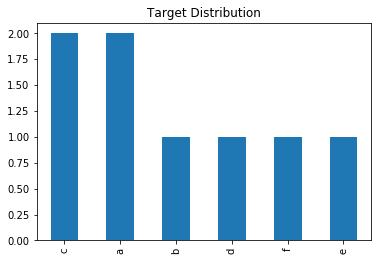

In [0]:
plt.title('Target Distribution')
data.plot.bar()
plt.show()

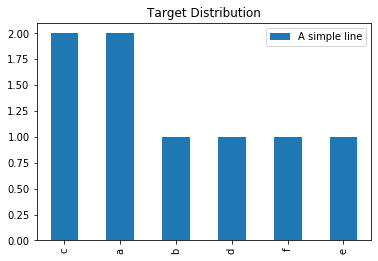

In [0]:
plt.title('Target Distribution')
data.plot.bar()

plt.legend(['A simple line'])
plt.show()

***pyspark***

pandas:
works ok up to 5GB of data
for 5 to 30 GB we can use chunk size

In [0]:
import pandas as pd

In [0]:
data=pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
data.shape

(1728, 7)

In [0]:
# load the big file in smaller chunks
c_size = 500 # Here the chunk size 500 means, we will be reading 500 lines at a time.
for gm_chunk in pd.read_csv('car_evaluation.csv',chunksize=c_size):
    print(gm_chunk.shape)


(500, 7)
(500, 7)
(500, 7)
(228, 7)


**here the problem is if while loading a huge data if any error is encountered then pandas does not give any error.**


**if the data size goes above 100G , then dask can be used**
# dask
it has a inbuild parallel processing capability

In [0]:
import dask.array as da # 'da' has all the properties of numpy

In [0]:
# this gets generated in no time
a = da.random.randint(low=0, high=100, size=100000000).reshape(10000, 10000)

In [0]:
type(a)

dask.array.core.Array

In [0]:
a

dask.array<reshape, shape=(10000, 10000), dtype=int32, chunksize=(2500, 10000), chunktype=numpy.ndarray>

In [0]:
a.compute()

array([[68, 51, 58, ..., 45, 28, 93],
       [69, 29,  3, ..., 20, 93, 50],
       [74, 24,  5, ...,  0,  0,  8],
       ...,
       [60, 60, 65, ..., 80, 83, 39],
       [95, 68, 15, ..., 20, 92, 26],
       [64, 57, 11, ..., 62, 90, 67]])

In [0]:
# we can create Dataframe using dask
import dask.dataframe as dd

In [0]:
data= dd.read_csv('car_evaluation.csv')
data.compute()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


**Using dask we can probably manage upto 200GB of data**

**if we have TB's of data** 100GB - 1TB, 1000TB - 1PB 

**we have to use spark, pyspark** - it provides a bigdata solution

In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 62kB/s 
     |████████████████████████████████| 204kB 45.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=57a06bbc31da85b2d04b7b7876dd5e9dcb5d992d06f677bbb6e430871eae2d89
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import pyspark as spark

In [0]:
from pyspark import SparkContext, SQLContext

In [0]:
sc = SparkContext()
s = SQLContext(sc)

In [8]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
data = s.read.options(header=True).csv('sample_data/california_housing_train.csv')

In [15]:
data.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000| 262.000000|     1.925000|    

In [17]:
# show columns
data.select('total_bedrooms').show(5)

+--------------+
|total_bedrooms|
+--------------+
|   1283.000000|
|   1901.000000|
|    174.000000|
|    337.000000|
|    326.000000|
+--------------+
only showing top 5 rows



In [18]:
data.select(['total_bedrooms','population']).show(5)

+--------------+-----------+
|total_bedrooms| population|
+--------------+-----------+
|   1283.000000|1015.000000|
|   1901.000000|1129.000000|
|    174.000000| 333.000000|
|    337.000000| 515.000000|
|    326.000000| 624.000000|
+--------------+-----------+
only showing top 5 rows



pyspark can process huge data without any limitation.
It can readd SQL data, Hadoop hive etc.

**OOP**

In [0]:
# empty class
class car:
    pass

In [0]:
class car:
    # constructor
    def __init__(self, model):
        self.model = model
        
    def add_car(self, hp, price):
        self.hp = hp
        self.price = price
        
    def get_car(self):
        return self.model, self.hp, self.price

In [0]:
car1 = car('maruti')

In [0]:
car1.add_car(1200, 5)

In [0]:
print(car1.get_car())

('maruti', 1200, 5)


In [0]:
car1.price

NameError: name 'car1' is not defined

pdb (debugger)

In [0]:
import pdb

def cal_val(x):
  x = x**3
  pdb.set_trace() # breakpoint
  return x

In [0]:
cal_val(3)

> <ipython-input-59-b925814294f8>(6)cal_val()
-> return x


(Pdb)  h



Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb



(Pdb)  p x


27


(Pdb)  continiue


*** NameError: name 'continiue' is not defined


(Pdb)  continue


27

In [0]:
# Inheritance
# Base Class --(properties)--> Derived class

In [0]:
class base_class:
    def __init__(self, data):
        print('base class')
        self.data=data
        
    def func1(self):
        print('base class func1')
        

class child_class(base_class):
    def __init__(self, x):
        base_class.__init__(self, x)
        print(child_class.__name__)
        
    def func2(self):
        return self.data


In [0]:
obj = child_class(2)

base class
child_class


In [0]:
obj.func1()

base class func1


In [0]:
obj.func2()

2

Types of inheritance ->
Single, Multiple, Multilevel, Hierarchical 

Single inheritence : One child and One Parent class.

Multiple inheritence: Multiple parent class(more than one) is involved.

Multilevel inheritence: a child class is a parent class of another child class.

Hierarchical inheritence: more than one type of inheritence coexists together.

In [0]:
# Multiple inheritence:
class base_class1:
    def func1(self):
        print('base1')
        
class base_class2:
    def func2(self):
        print('base2')
        
class child_class(base_class1, base_class2):
    def cfunc(self):
        print(child_class.__name__)

In [0]:
c = child_class()
c.func1()

base1


In [0]:
c.func2()

base2


Python Super function : Super function directly calls the parent class method.

In [0]:
class base_class1:
    def func1(self):
        print('base1')
            
class child_class(base_class1):
    def cfunc(self):
        super().func1() # Super function
        print(child_class.__name__)

In [0]:
c = child_class()

In [0]:
c.cfunc()

base1
child_class


Method Overriding: change the functionality of the parent class function

In [0]:
class base_class1:
    def func1(self):
        print('base1 fucn1')
            
class child_class(base_class1):
    def func1(self): # over ride the parent class  base_class1 method func1()
        print("In func1 child class")

In [0]:
c = child_class()

In [0]:
c.func1()

In func1 child class


List comprehension

In [0]:
# insted of writing a seperate function we can write for & if inside python list
list1=[1,2,4,5,6]

# make a new list with values square of list1
list2=[x*x for x in list1]
list2

[1, 4, 16, 25, 36]

In [0]:
# make a new list with values square of list1's even elements
list2=[x*x for x in list1 if x%2==0]
list2

[4, 16, 36]